In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# making the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

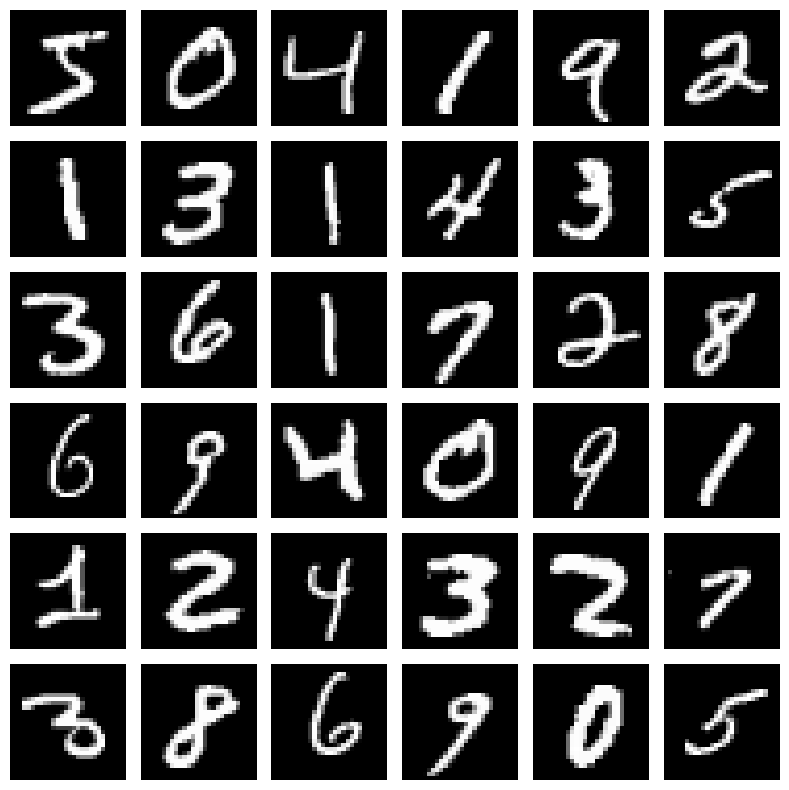

In [ ]:
n = 6
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(8, 8))
for i in range(n**2):
    ax = axs[i // n, i % n]
    (X_train[i]+1)/2
    ax.imshow((X_train[i, :, :, 0] + 1)/2, cmap=plt.cm.gray)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# data normalization
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

In [ ]:
# linear stack
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/10
469/469 [==============================] - 24s 51ms/step - loss: 0.1904 - accuracy: 0.9456 - val_loss: 0.0757 - val_accuracy: 0.9750
Epoch 2/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0596 - accuracy: 0.9826 - val_loss: 0.0608 - val_accuracy: 0.9803
Epoch 3/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0350 - accuracy: 0.9898 - val_loss: 0.0604 - val_accuracy: 0.9818
Epoch 4/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0519 - val_accuracy: 0.9825
Epoch 5/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0465 - val_accuracy: 0.9852
Epoch 6/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0567 - val_accuracy: 0.9829
Epoch 7/10
469/469 [==============================] 

In [ ]:
# model training
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

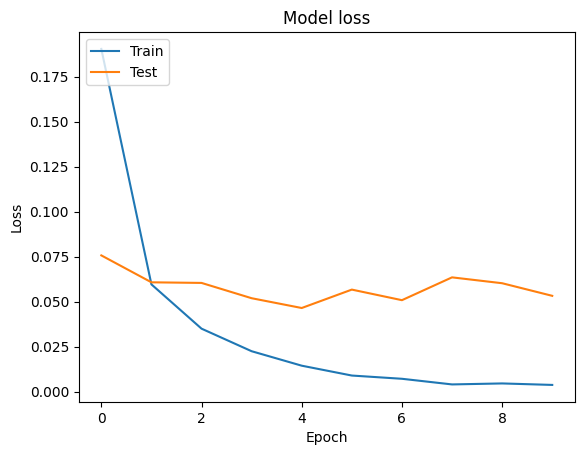

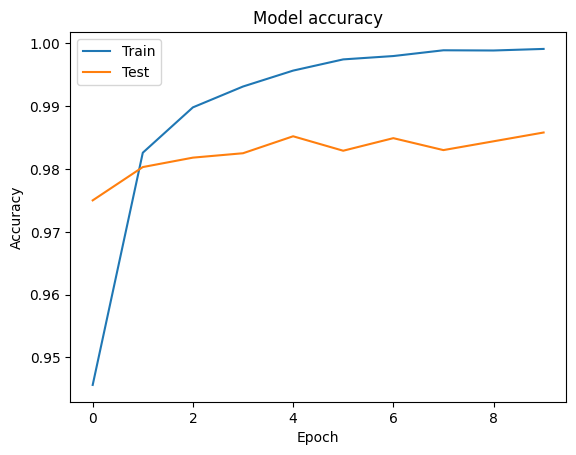

In [ ]:

# validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()